# Heart Disease with Logistic Regression

### Cordivacular diseases, in colloquial speech heart diseases can be big trouble for human kind. In this kernel we are going to try to make analysis about this illness by investigating different parameters.

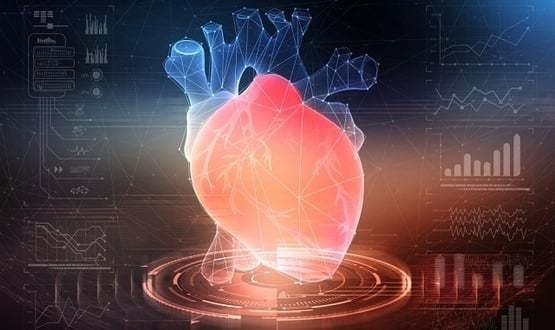

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Read Data

In [ ]:
data = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [ ]:
data.head()

In [ ]:
data.columns

## First of all I want to have a look at the features meanings :
####  * age       --> age
#### * sex       --> gender in binary (1:male, 0:female)
#### * cp        --> chest pain type
#### * trestbps  --> resting blood pressure (in mm Hg on admission to the hospital)
#### * chol      --> serum cholestoral in mg/dl
#### * fbs       --> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### * restecg   --> resting electrocardiographic results
#### * thalach   --> maximum heart rate achieved
#### * exang     --> exercise induced angina (1 = yes; 0 = no)
#### * oldpeak   --> ST depression induced by exercise relative to rest
#### * slope     --> the slope of the peak exercise ST segment
#### * ca        --> number of major vessels (0-3) colored by flourosopy
#### * thal      --> 3 = normal; 6 = fixed defect; 7 = reversable defect
#### * target    --> have disease or not (1=yes, 0=no)

In [ ]:
data.corr()

#### This is corrolation table. By the helping of this table we can see that if features have corrolation or not (if values is close to 1 there is positive corrolation, if near to -1 negative corrolation, and if it near to 0 there are no corrolation). As you see there are not much corrolated features in our data. The map you will see in below is corrolation map:

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

#### By this method, you can have a look at what you want to dig in. In this senerio target must be our target :

In [ ]:
data.corr()["target"].sort_values()

In [ ]:
data.info()

#### This is the data types that what we will work on. 12 integers and 1 float and all of them is filled with non-null. We can double check like that also :

In [ ]:
data.isnull().sum()

#### Now its time to getting more familiar with the data :

In [ ]:
data.describe()

## Visualization

#### The first thing I wondered is dependecy between illness and age:

#### Initially we need to view a pandas function which is crosstab. Crosstab computes a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed. For example: 


In [ ]:
pd.crosstab(data.age,data.target)

#### As you see the the information we wanted, they are grouped

In [ ]:
crosstabAge = pd.crosstab(data.age,data.target)
crosstabAge.plot(kind="bar",figsize=(20,8), color ="cmyk", alpha = 0.8) #alpha is opacity
plt.title('Heart Disease Frequency Given Ages')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.legend(["Have not Disease", "Have Disease"])
plt.show()

#### According to table, 41, 51, 52, 54 are the ages that heart diseases mostly seen.

#### But what about the numbers of the target ?

In [ ]:
data["target"].value_counts()

In [ ]:
sns.countplot(data["target"], palette="Set2")
plt.xlabel(' 0 = Not Have Disease,  1 = Have Disease')

#### What about the difference between man and woman ?

In [ ]:
crosstabSex = pd.crosstab(data["sex"], data["target"])
crosstabSex

In [ ]:
crosstabSex.plot(kind="bar", figsize=(15,6), color="cmyk")
plt.title("Heart Disease Frequency Given Sex")
plt.xticks(rotation=0)
plt.xlabel("0 = Female , 1 = Male")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

#### According to table, men have more tendecy to have heart diseases.

#### So whats next ? fbs : Fasting Blood Sugar

In [ ]:
crosstabFbs = pd.crosstab(data["fbs"], data["target"])
crosstabFbs

In [ ]:
crosstabFbs.plot(kind="bar", figsize=(10, 8), color="cmyk")
plt.xticks(rotation=0)
plt.xlabel("Fasting Blood Sugar < 120 : 0 | Fasting Blood Sugar > 120 : 1")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

#### This result actually suprised me because i expected more datas on fasting blood sugar > 1 but there are not much.

In [ ]:
data.fbs.value_counts()

In [ ]:
crosstabExang = pd.crosstab(data["exang"], data["target"])
crosstabExang

In [ ]:
crosstabExang.plot(kind="bar", figsize=(10, 8), color="cmyk")
plt.xticks(rotation=0)
plt.xlabel("Exercise Induced Angina 0 : No | 1 : Yes")
plt.ylabel("Frequency")
plt.legend(["Have not Disease", "Have Disease"])

#### Another interesting result. Exercise induced angina is the problem that chest pain, relaxation and pressure hiss caused by ischemia or corner spasm in the heart muscle of the day. 

## Logistic Regression

#### In this tutorial, I am going to write logistic regression code by myself basicaly. After that with sklearn.

#### Lets define x and y values

In [ ]:
y = data.target.values #values convert values onto numpy array
x_data = data.drop(["target"], axis=1) #except for target the other columns is our x data

In [ ]:
print(y)

#### First of all, we need to make normalization on data because in this data there are some values like 140, 250 (trestbs, chol) and there are binary values like 0 and 1. This may cause overtower between datas on features. To prevent this, we are doing normalization.

### X_normalized = (x - x minimum)/(x maximum - x minimum)

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

In [ ]:
x

#### Alright its time to split to train and test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

### So, How Its Work ?

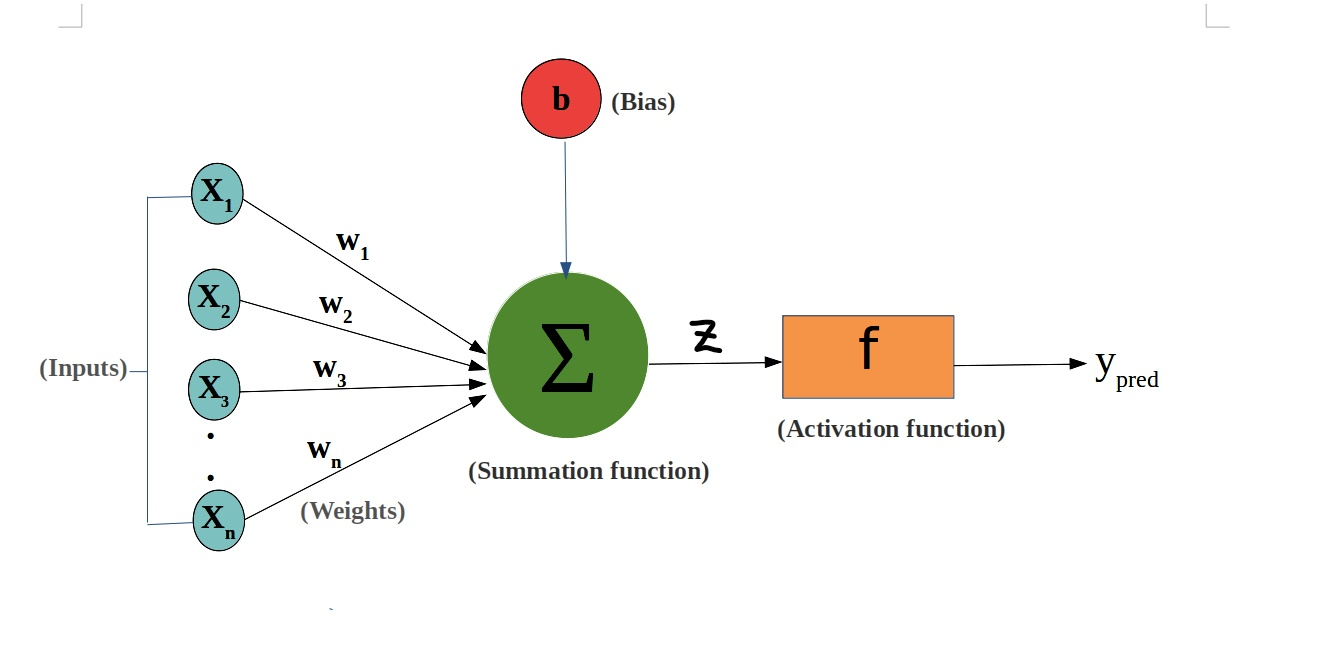

#### Well, what are those things ?
* Inputs (x1, x2, x3 ... xn) are our specific values on each column
* Weights are coefficent 
* Bias is interception
* Activation functions are mathematical functions like unit step function, sigmoid etc. We will use sigmoid
* Basicaly its working based on very familiar expression y = wx + b
* In this scenario , z = b + w1.x1 + w2.x2 + .... + w302.x302
* y_pred is sigmoid(z) (will work on sigmoid a little later)

### Initializing Weights and Bias

In [ ]:
def initialize_weights_and_bias(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight,bias

#### The values must be defined. In initialize_weights_and_bias function I defined the initial values. This values are not very important because after forward and bacward propagations values will be updated.

#### For whom asking what is np.full : 

In [ ]:
np.full((10, 1), 0.01)

### Sigmoid Function

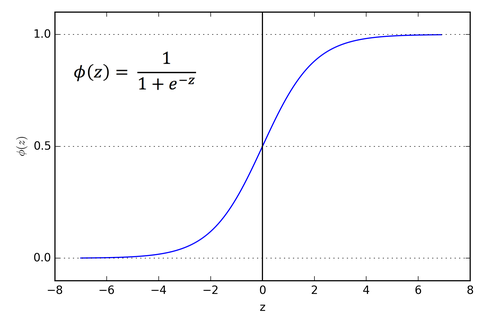

#### Sigmoid function returns probabilistic values. For example at the point 2, nearly %75 probability this value classified as 1

In [ ]:
def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))
    return y_head

## Forward-Backward Propagation and Gradient Descent

#### Basically in neural networks (logistic regression is fundamental form of neural networks), you forward propagate to get the output and compare it with the real value to get the error. Now, to minimize the error, you propagate backwards by finding the derivative of error with respect to each weight and then subtracting this value from the weight value. The purpose of this calculations is optimize the algorithm. This operation can be done with gradient descent method.

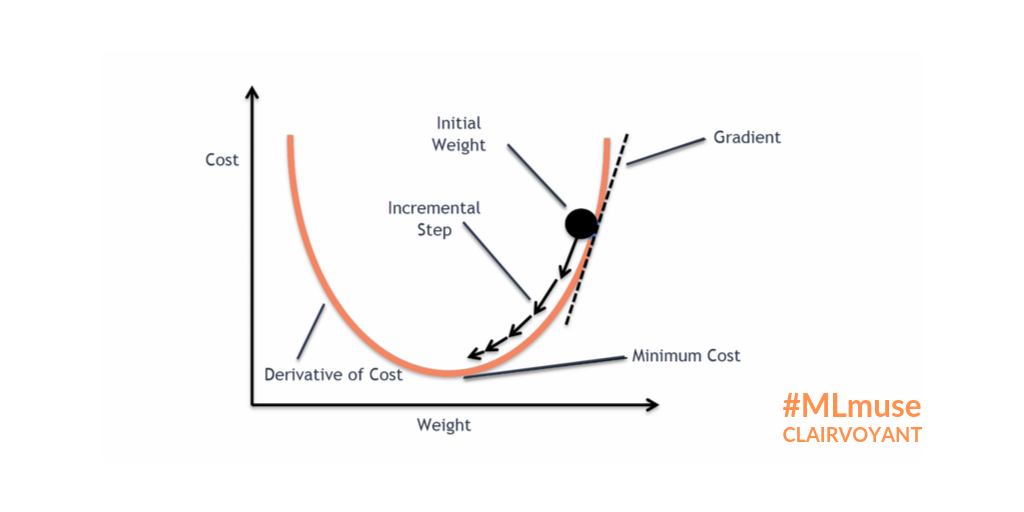

### Loss = (Y)(-log(Y_pred)) + (1-Y)(-log(1-Y_pred))

#### This is loss function. Sumation for each value is cost function. If you predict 1 and the result is 1 you will get 0 loss otherwise big amount of lost.

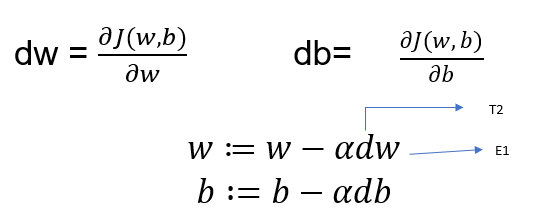

#### This is updating equations. By taking derivative of cost function according to weight and bias. Then multiply it with α learning rate. Step by step model will be updated by this method. Learning rate can be say like learning speed. In other words, Incremental step is stepping by the helping of learning rate.

#### Lets continue to code :

In [ ]:
def forward_backward_propagtion(weight, bias, x_train, y_train):
    # forward propagation
    z = np.dot(weight.T,x_train) + bias # z = b + w1.x1 + w2.x2 + .... + w302.x302
    y_head = sigmoid(z)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1] #x_train.shape[1] for normalization
    
    # backward propagation
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1] #simple derivative
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias} #for storage
     
    return cost,gradients


In [ ]:
def update(weight, bias, x_train, y_train, learning_rate, iteration) :
    cost_list = []
    index = []
    
    # updating(learning) parameters in number_of_iterarion times
    for i in range(iteration):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagtion(weight,bias,x_train,y_train)
        # update
        weight = weight - learning_rate * gradients["Derivative Weight"]
        bias = bias - learning_rate * gradients["Derivative Bias"]
        
        cost_list.append(cost)
        index.append(i)
        print ("Cost after iteration %i: %f" %(i, cost))
        
    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,cost_list)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [ ]:
def predict(weight, bias, x_test):
    # x_test is an input for forward propagation
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iteration):
    # initialize
    dimension = x_train.shape[0]
    weight,bias = initialize_weights_and_bias(dimension)
     
    parameters, gradients = update(weight, bias,x_train, y_train, learning_rate, iteration)

    y_prediction = predict(parameters["weight"],parameters["bias"],x_test)
    
    print("Accuracy of Model : {}%".format((100 - np.mean(np.abs(y_prediction - y_test))*100)))

In [ ]:
logistic_regression(x_train,y_train,x_test,y_test,2,200)

## Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T))) #

## Conclusion

#### In this tutorial, first we do exploratory data analysis then we generate our logistic regression model by hand then tried it by sklearn